<a href="https://colab.research.google.com/github/liizaaa/machine_learning/blob/main/%D1%87%D0%B5%D1%82%D0%B2%D0%B5%D1%80%D1%82%D0%B0%D1%8F_%D0%BB%D0%B0%D0%B1%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import seaborn as sns

In [31]:
df = pd.read_csv("Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [32]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


удалим 35 строчек с профессиями

In [46]:
dff = df.dropna()
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              1965 non-null   int64
 1   Gender                  1965 non-null   int64
 2   Age                     1965 non-null   int64
 3   Annual Income ($)       1965 non-null   int64
 4   Spending Score (1-100)  1965 non-null   int64
 5   Profession              1965 non-null   int64
 6   Work Experience         1965 non-null   int64
 7   Family Size             1965 non-null   int64
 8   KMeans Cluster          1965 non-null   int32
dtypes: int32(1), int64(8)
memory usage: 145.8 KB


In [34]:
label_encoder = LabelEncoder()

In [47]:
dff['Gender'] = label_encoder.fit_transform(dff['Gender'])
dff['Profession'] = label_encoder.fit_transform(dff['Profession'])
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,KMeans Cluster
0,1,1,19,15000,39,5,1,4,2
1,2,1,21,35000,81,2,3,3,2
2,3,0,20,86000,6,2,1,1,1
3,4,0,23,59000,77,7,0,2,2
4,5,0,31,38000,40,3,2,6,2


In [48]:
numeric_features = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size', 'Gender', 'Profession']

In [50]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dff[numeric_features])

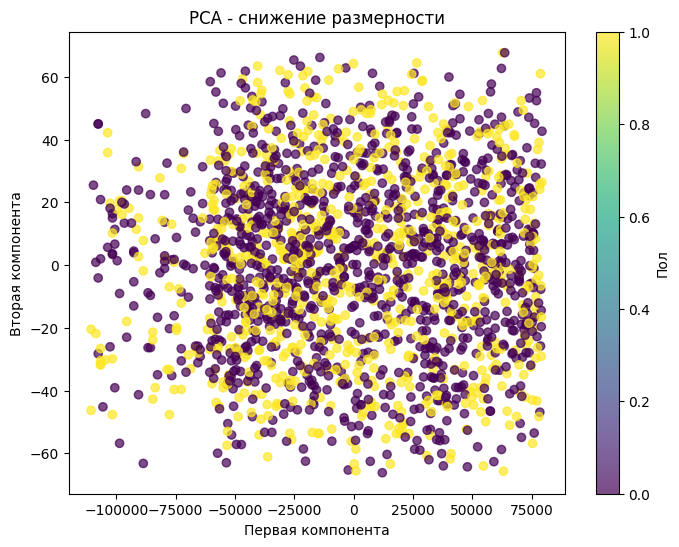

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dff['Gender'], cmap='viridis', alpha=0.7)
plt.title('PCA - снижение размерности')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.colorbar(label='Пол')
plt.show()

In [39]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df[numeric_features])

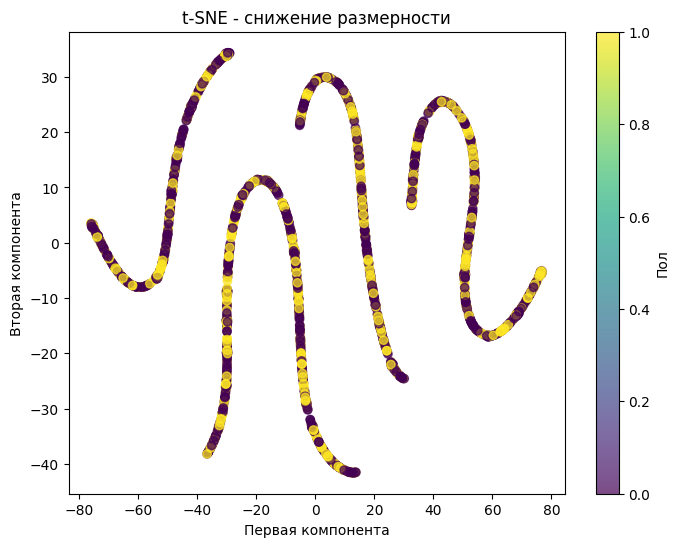

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['Gender'], cmap='viridis', alpha=0.7)
plt.title('t-SNE - снижение размерности')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.colorbar(label='Пол')
plt.show()

In [42]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [43]:
kmeans_result = kmeans.fit_predict(pca_result)

In [44]:
df['KMeans Cluster'] = kmeans_result

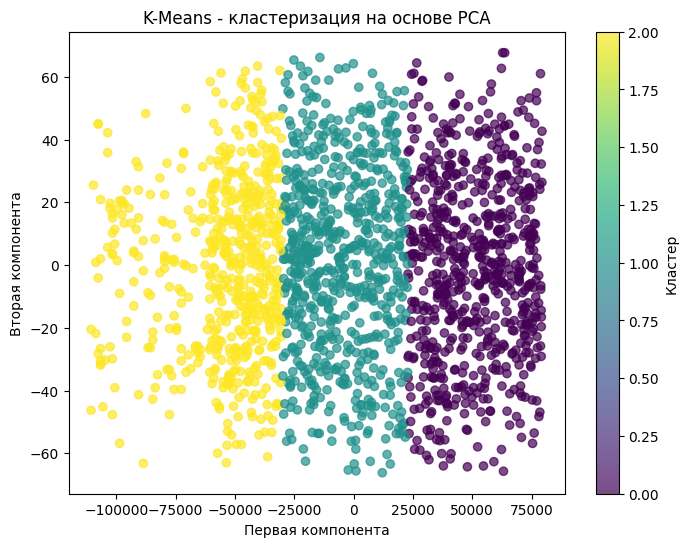

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_result, cmap='viridis', alpha=0.7)
plt.title('K-Means - кластеризация на основе PCA')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.colorbar(label='Кластер')
plt.show()

In [53]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_result = dbscan.fit_predict(pca_result)

In [55]:
dff['DBSCAN Cluster'] = dbscan_result

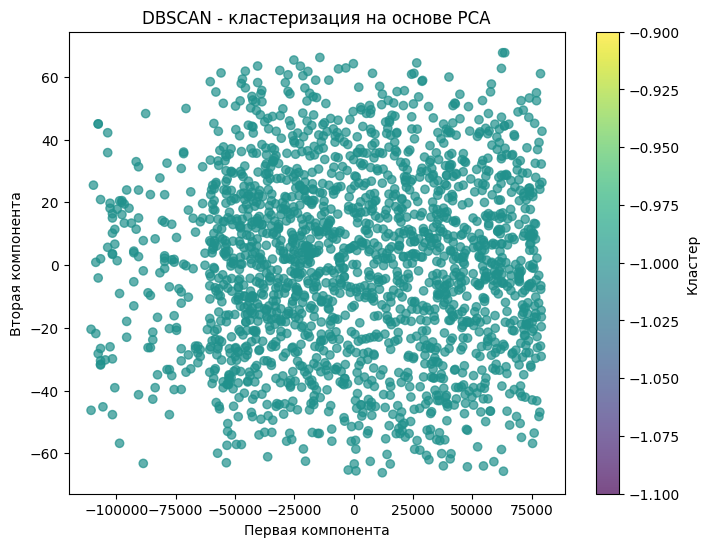

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dbscan_result, cmap='viridis', alpha=0.7)
plt.title('DBSCAN - кластеризация на основе PCA')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.colorbar(label='Кластер')
plt.show()

In [74]:
tsne = TSNE(n_components=2, random_state=42, n_iter=250)
tsne_result = tsne.fit_transform(dff[numeric_features].sample(1000, random_state=42))

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [75]:
dbscan_tsn_result = DBSCAN(eps=0.5, min_samples=5).fit_predict(tsne_result)

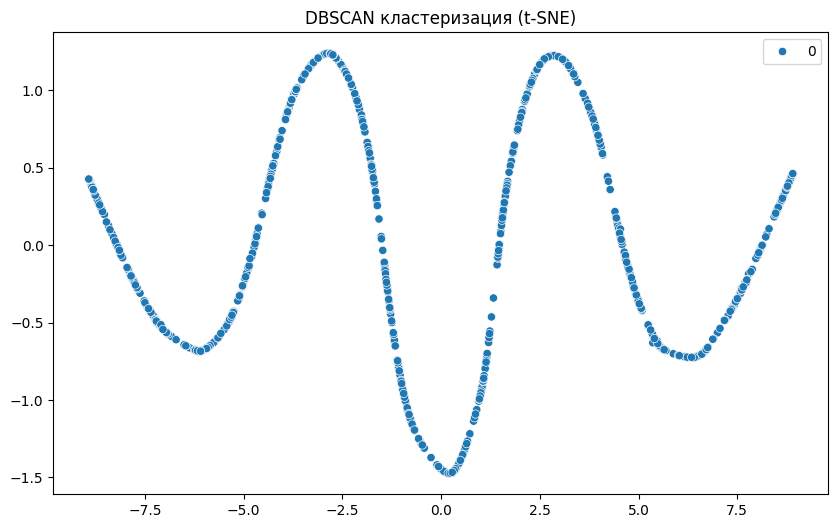

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=dbscan_tsn_result, palette='tab10')
plt.title('DBSCAN кластеризация (t-SNE)')
plt.show()

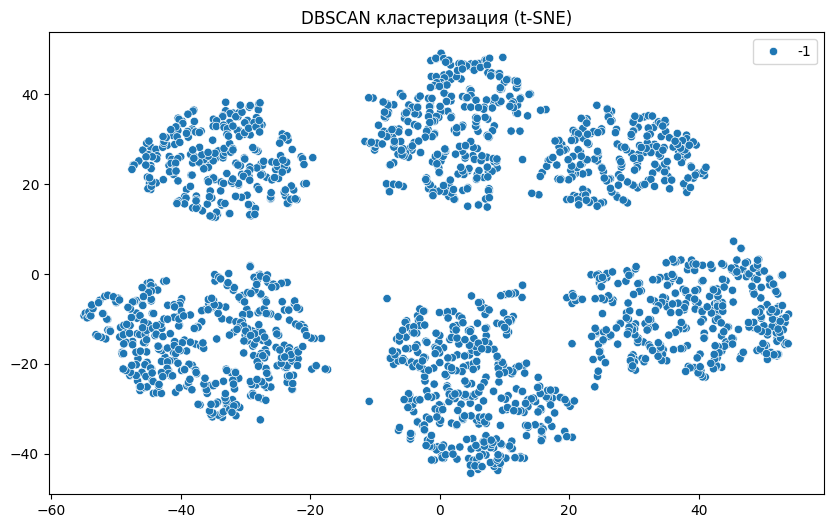

In [80]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dff)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_data)

# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=dbscan_clusters, palette='tab10')
plt.title('DBSCAN кластеризация (t-SNE)')
plt.show()

##Климат и болезни

In [82]:
climate_disease = pd.read_csv("climate_disease_dataset.csv")
climate_disease.head()

,year,month,country,region,avg_temp_c,precipitation_mm,air_quality_index,uv_index,malaria_cases,dengue_cases,population_density,healthcare_budget
0,2000,1,Palestinian Territory,Central,28.132468,152.083870,110.487231,12.000000,53,145,113,1068
1,2000,2,Palestinian Territory,Central,30.886500,119.591418,83.467928,12.000000,132,48,113,1068
2,2000,3,Palestinian Territory,Central,31.366433,95.876124,93.095292,12.000000,34,80,113,1068
3,2000,4,Palestinian Territory,Central,28.481870,175.315731,105.530192,9.395894,23,133,113,1068
4,2000,5,Palestinian Territory,Central,26.890370,191.445990,60.205979,9.935726,39,74,113,1068


In [83]:
climate_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34560 entries, 0 to 34559
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                34560 non-null  int64  
 1   month               34560 non-null  int64  
 2   country             34560 non-null  object 
 3   region              34560 non-null  object 
 4   avg_temp_c          34560 non-null  float64
 5   precipitation_mm    34560 non-null  float64
 6   air_quality_index   34560 non-null  float64
 7   uv_index            34560 non-null  float64
 8   malaria_cases       34560 non-null  int64  
 9   dengue_cases        34560 non-null  int64  
 10  population_density  34560 non-null  int64  
 11  healthcare_budget   34560 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 3.2+ MB


In [84]:
label_encoder = LabelEncoder()
climate_disease['country'] = label_encoder.fit_transform(climate_disease['country'])
climate_disease['region'] = label_encoder.fit_transform(climate_disease['region'])

In [85]:
scaler = StandardScaler()
numerical_features = ['avg_temp_c', 'precipitation_mm', 'air_quality_index', 'uv_index', 'malaria_cases',
                      'dengue_cases', 'population_density', 'healthcare_budget']
climate_disease[numerical_features] = scaler.fit_transform(climate_disease[numerical_features])

In [87]:
climate_disease.head()

,year,month,country,region,avg_temp_c,precipitation_mm,air_quality_index,uv_index,malaria_cases,dengue_cases,population_density,healthcare_budget
0,2000,1,84,0,0.919915,-0.448430,2.016356,0.923900,-0.379786,1.850281,-1.131625,-1.196426
1,2000,2,84,0,1.247354,-0.807452,1.199550,0.923900,1.332762,-0.748634,-1.131625,-1.196426
2,2000,3,84,0,1.304415,-1.069492,1.490589,0.923900,-0.791664,0.108740,-1.131625,-1.196426
3,2000,4,84,0,0.961456,-0.191732,1.866502,-0.420840,-1.030120,1.528766,-1.131625,-1.196426
4,2000,5,84,0,0.772236,-0.013502,0.496330,-0.142075,-0.683275,-0.052018,-1.131625,-1.196426


In [88]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(climate_disease[numerical_features])

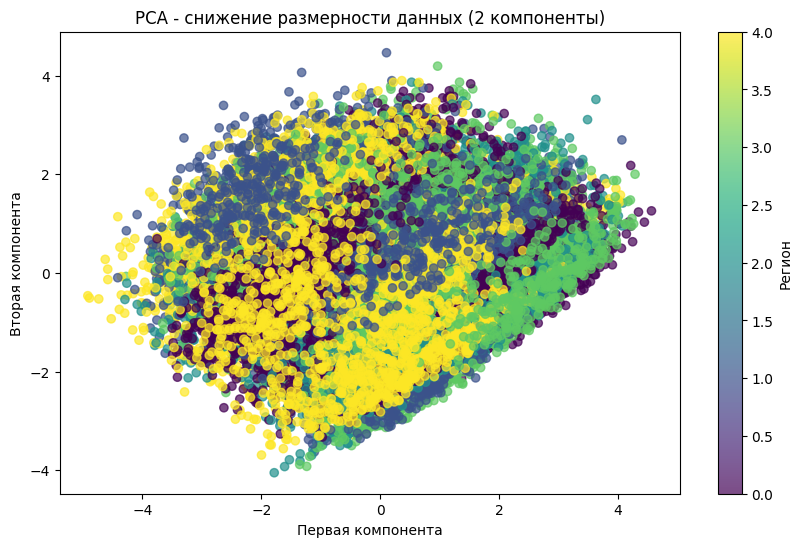

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=climate_disease['region'], cmap='viridis', alpha=0.7)
plt.title('PCA - снижение размерности данных (2 компоненты)')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.colorbar(label='Регион')
plt.show()

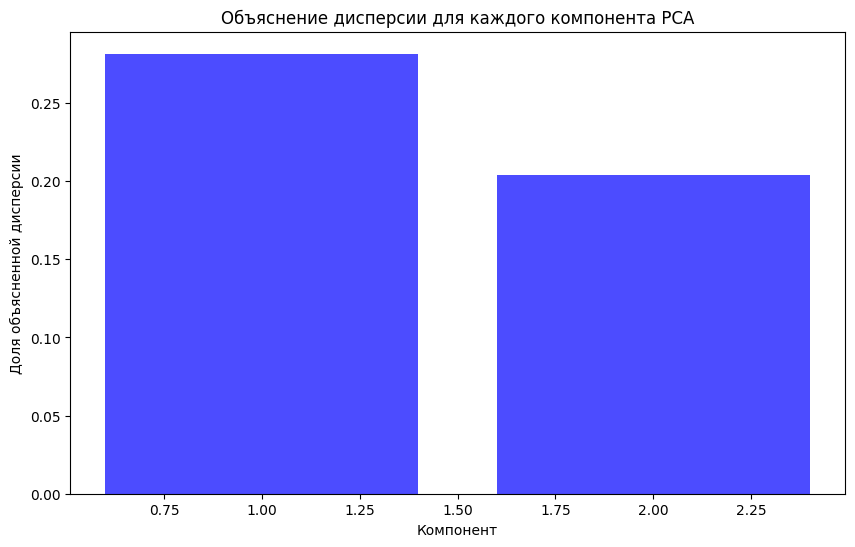

In [96]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, color='b')
plt.title('Объяснение дисперсии для каждого компонента PCA')
plt.xlabel('Компонент')
plt.ylabel('Доля объясненной дисперсии')
plt.show()

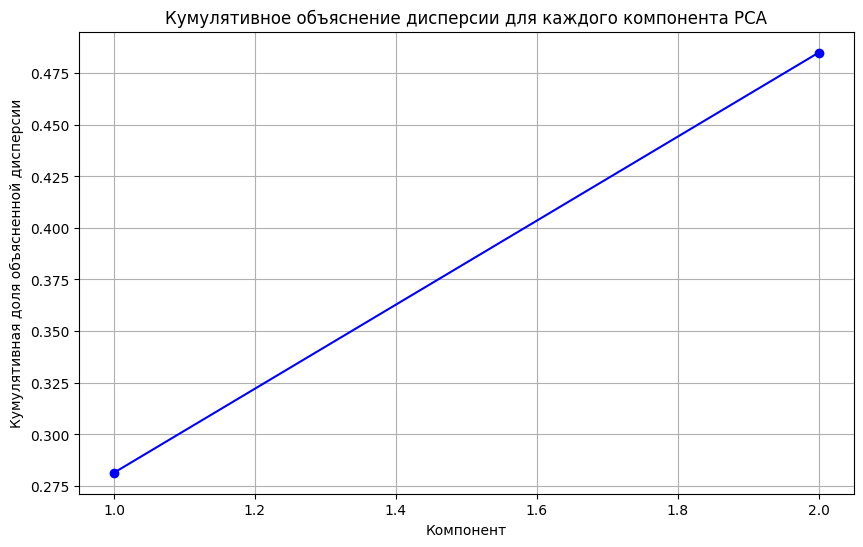

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='b')
plt.title('Кумулятивное объяснение дисперсии для каждого компонента PCA')
plt.xlabel('Компонент')
plt.ylabel('Кумулятивная доля объясненной дисперсии')
plt.grid(True)
plt.show()